# Gaussian formula

Quantum state of light is classified to "Gaussian state" or "Non-Gaussian state".  
Computation with only Gaussian state has more simple fomulation.

- Gaussian Wigner function[[1]](https://arxiv.org/abs/quant-ph/0410100)

$W(\xi) = \frac{1}{(2\pi)^{N} \sqrt{\det V^{(N)}}} \exp{\left( -\frac{1}{2}(\xi-\mu) [V^{(N)}]^{-1} (\xi-\mu)^{T} \right)}$

It looks like classical Gaussian distribution.

$\xi = [q_{1}, p_{1}, q_{2}, p_{2}, \dots, q_{N}, p_{N}]$ represents $N$ qumode's Quadrature phase respectively.  
$\mu$ is mean of $\xi$.  
$V^{(N)}$ is $2N \times 2N$ covarianve matrix.

Same as classical Gaussian distribution, Gaussian Wigner function is parameterized by 1st (mean) and 2nd (covariance) moments.

- first moment  
$\bar{\boldsymbol{\xi}} = \langle \hat{\boldsymbol{\xi}} \rangle= \mathrm{Tr}[\hat{\boldsymbol{\xi}} \hat{\rho}]$

- second moment  
$V_{ij} = \frac{1}{2}\langle \{\Delta\hat{\xi}_i, \Delta\hat{\xi}_j \}\rangle$  
$\{ A, B \} = AB+BA$

Gate operations in Gaussian formula relies on these mean and covariance parameters.

### Computational efficiency of Gaussian formula

Gaussian formula doesn't have non-linear gates required for universal quantum computation.

Actually, Gaussian formula use $2N\times 2N$ matrix for N qumodes.  
It means state space increases linear to number of qumodes, so classical computers can simulate it efficiently.

So there is no quantum advantage with only gates in Gaussian formula.  

(Quantum advantage with GBS uses photon number measurement as non-Gaussian resource.)

In [1]:
import photonqat as pq
import numpy as np

## Basic operations

### Desplacement gate

Displace quantum state $(\rm{Re}(\alpha), Im(\alpha))$ on phase space $(q, p)$.

$$
\begin{bmatrix}
q \\
p
\end{bmatrix}
\to 
\begin{bmatrix}
q+Re(\sqrt{2}\alpha) \\
p+Im(\sqrt{2}\alpha)
\end{bmatrix}
$$

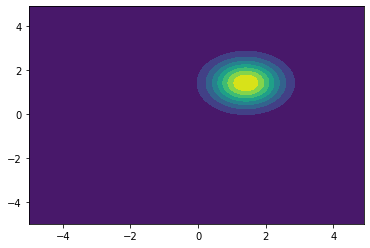

In [4]:
alpha = (1 + 1j) # parameter

G = pq.Gaussian(1)
G.D(0, alpha) # Dgate

G.run()

(x, p, W) = G.Wigner(0, plot = 'y', xrange = 5.0, prange = 5.0) # plot Wigner function

### Squeezing gate 


Squeeze quantum state on phase space $(q, p)$.  
Parameter $r$ represents degree of squeezing.  ($r>0:q$ direction, $r<0:p$ direction)。  
Squeezing on some direction leads broadening in perpendicular direction.

$$
S=\begin{bmatrix}
e^{-r} & 0 \\
0 & e^{r}
\end{bmatrix}
$$

$$
V \to SVS^{T} \\
\mu \to S\mu
$$

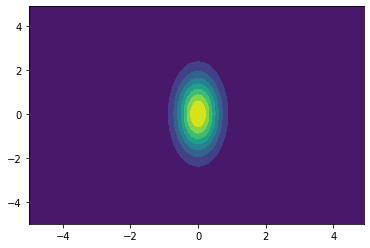

In [2]:
r = .5

G = pq.Gaussian(1)
G.S(0, r) # Sgate

G.run()

(x, p, W) = G.Wigner(0, plot = 'y', xrange = 5.0, prange = 5.0) # plot Wigner function

### Beam splitter



Beam splitter mixes the two modes of light.  
It reflect $R$%, and transmit $T$% of input light ($R + T=100$), also called as partial reflecting mirrors.  

$V, \mu$ are $4\times4$ matrix and $4$ elements vector for 2 qumode respectively.

$$
S=\begin{bmatrix}
\cos{\theta} & 0 & \sin{\theta} & 0\\
0 & \cos{\theta} & 0 & \sin{\theta} \\
-\sin{\theta} & 0 & \cos{\theta} & 0 \\
0 & -\sin{\theta} & 0 & \cos{\theta}
\end{bmatrix}
$$


$$
V \to SVS^{T} \\
\mu \to S\mu
$$

Gaussian formula can't simulate HOM interferometer because it can't handle photon number states.  
Instead of it, Desplace mode 0 with D gate and mix mode 0 and mode 1 with beam splitter.  
We expect state of mode 1 changes.

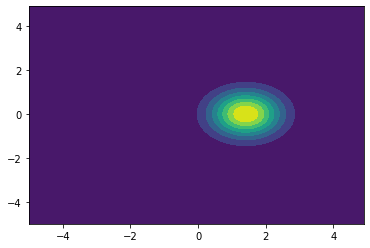

In [30]:
alpha = np.sqrt(2)
G = pq.Gaussian(2)
G.D(0, alpha) # mode 0をDesplace
G.BS(0, 1, -np.pi/4) # 50:50 ビームスプリッタ
G.run()

(x, p, W) = G.Wigner(1, plot = 'y', xrange = 5.0, prange = 5.0) # plot Wigner function for mode1

## References

[1] https://arxiv.org/abs/quant-ph/0410100